<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/LSTM_first_approach_for_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [2]:
max_features = 10000
max_len = 500
batch_size = 32

In [3]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
train_data[0:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [5]:
train_label[0:1]

array([1])

In [ ]:
#label 0 is for positive sentiment
#label 1 is for negative sentiment

In [6]:
train_data = sequence.pad_sequences(train_data,maxlen=max_len)

In [7]:
test_data = sequence.pad_sequences(test_data,maxlen=max_len)

In [10]:
from keras.layers import LSTM,Dense,Embedding 
from keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
model.add(Embedding(max_features,32))

In [13]:
model.add(LSTM(32))

In [14]:
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_data,train_label,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1084 - accuracy: 0.9619 - val_loss: 0.3690 - val_accuracy: 0.8768
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1005 - accuracy: 0.9652 - val_loss: 0.3462 - val_accuracy: 0.8738
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0905 - accuracy: 0.9687 - val_loss: 0.3730 - val_accuracy: 0.8764
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0934 - accuracy: 0.9671 - val_loss: 0.3651 - val_accuracy: 0.8772
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0770 - accuracy: 0.9746 - val_loss: 0.4610 - val_accuracy: 0.8792
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0787 - accuracy: 0.9735 - val_loss: 0.4227 - val_accuracy: 0.8738
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0726 - accuracy: 0.9757 - val_loss: 0.4593 - val_accuracy: 0.8758

#Accuracy and loss plots

In [17]:
import matplotlib.pyplot as plt

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

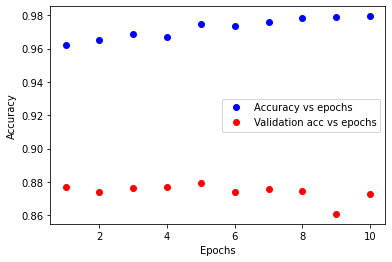

In [24]:
plt.plot(epochs,acc,'bo',label='Accuracy vs epochs')
plt.plot(epochs,val_acc,'ro',label='Validation acc vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()